In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import openpathsampling.storage as st

storage = st.AnalysisStorage("mstis.nc")

In [2]:
len(storage.steps)

301

In [3]:
mstis = storage.networks.load(0)
retis = mstis.sampling_transitions[0]

In [4]:
%%time
storage.samples.cache_all()

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11 µs


### Defining labels

Everything is actually done in terms of ensembles. We can map the ensembles to any labels. In our case, we use the initial replica ID associated with the ensemble. We use this as both the numeric and string label.

In [5]:
sset0 = storage.samplesets[0]
numeric_labels = { s.ensemble : s.replica for s in sset0}
string_labels = { s.ensemble : str(s.replica) for s in sset0 }
numeric_to_string = { numeric_labels[e] : string_labels[e] for e in numeric_labels.keys()}

## Trace of ensemble visited by a replica

In the plot below, you'll see we set the labels on the axis as sset0[e].replica, so we use the replica ID associated with the ensemble in the first timestep.

In [6]:
%%time
trace_1 = paths.trace_ensembles_for_replica(0, storage)

CPU times: user 4.66 ms, sys: 1.89 ms, total: 6.55 ms
Wall time: 5.12 ms


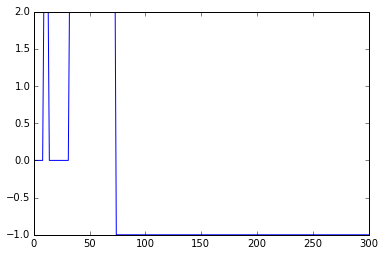

In [7]:
plt.plot([numeric_labels[e] for e in trace_1])

### Replica flow

In [8]:
repx_net = paths.ReplicaNetwork(storage=storage)
print repx_net

In [9]:
flow = repx_net.flow(bottom=retis.minus_ensemble, top=retis.ensembles[-1])
print flow

{<openpathsampling.ensemble.TISEnsemble object at 0x10f3b0a10>: 0.0, <openpathsampling.ensemble.TISEnsemble object at 0x10f3be650>: 0.0, <openpathsampling.ensemble.TISEnsemble object at 0x10f52c410>: 0.0, <openpathsampling.ensemble.MinusInterfaceEnsemble object at 0x10f53a290>: 1.0, <openpathsampling.ensemble.TISEnsemble object at 0x10f3b0c90>: 1.0, <openpathsampling.ensemble.UnionEnsemble object at 0x10f3be4d0>: 0.0, <openpathsampling.ensemble.MinusInterfaceEnsemble object at 0x10f3be850>: 0.0, <openpathsampling.ensemble.TISEnsemble object at 0x10f1fff10>: 0.0, <openpathsampling.ensemble.TISEnsemble object at 0x10f3b0f50>: 0.0, <openpathsampling.ensemble.MinusInterfaceEnsemble object at 0x10f3be610>: 0.0, <openpathsampling.ensemble.TISEnsemble object at 0x10f535090>: 0.0, <openpathsampling.ensemble.TISEnsemble object at 0x10f1ff7d0>: 0.0, <openpathsampling.ensemble.TISEnsemble object at 0x10f1ffc50>: 0.12149532710280374}


In [10]:
flow_num = {numeric_labels[k] : flow[k] for k in flow.keys()}
print flow_num

{0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0, 4: 0.0, 5: 0.12149532710280374, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, -1: 0.0, -3: 1.0, -2: 0.0}


In [11]:
sorted_vals = []
for k in sorted(flow_num.keys()):
    sorted_vals.append(flow_num[k])

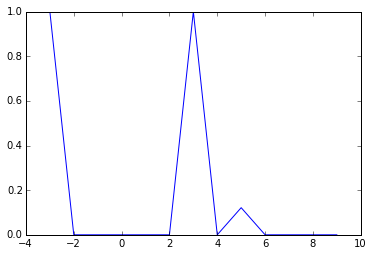

In [12]:
plt.plot(sorted(flow_num.keys()), sorted_vals)

### Trips

Now we calculate "up" trips, "down" trips, and round-trips.

In [13]:
repx_net.trips(bottom=retis.minus_ensemble, top=retis.ensembles[-1])

{'down': [], 'round': [], 'up': []}

### Transition matrix

The transition matrix is the (unsymmetrized) matrix of the transition probabilities. By default, it automatically sets its order from the Cuthill-McKee reverse ordering algorithm.

In [14]:
repx_net.transition_matrix()

,-3,3,5,6,9,8,-2,1,-1,2,0,7,4
-3,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0.024096,0.000000,0.120482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
5,0.000000,0.120482,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
6,0.000000,0.000000,0.024096,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
9,0.000000,0.000000,0.000000,0.024096,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
8,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.000000,0.000000,0.000000,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0,0
-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.036145,0,0


If you would like to set a different order, that can be done by providing a list of the ensembles in whatever order you choose:

In [15]:
import numpy as np
perm = np.random.permutation(len(mstis.all_ensembles))
print perm

[ 7 12 10  6  3  2  0  8  5  9  1 11  4]


In [16]:
order = [mstis.all_ensembles[p] for p in perm]
repx_net.transition_matrix(index_order=order)

,4,-3,-1,1,2,6,3,7,8,9,5,-2,0
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
-3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0,0.000000,0.000000,0.000000,0.000000,0.000000
-1,0,0.000000,0.000000,0.000000,0.012048,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.024096,0.000000
2,0,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.036145
6,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.024096,0.024096,0.000000,0.000000
3,0,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.120482,0.000000,0.000000
7,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.012048,0.000000,0.000000,0.000000
9,0,0.000000,0.000000,0.000000,0.000000,0.024096,0.000000,0,0.012048,0.000000,0.000000,0.000000,0.000000


### Mixing matrix

Same as the transition matrix $T$, but $\frac{1}{2}(T+T^T)$.

In [17]:
repx_net.mixing_matrix()

,-3,3,5,6,9,8,-2,1,-1,2,0,7,4
-3,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0.024096,0.000000,0.120482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
5,0.000000,0.120482,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
6,0.000000,0.000000,0.024096,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
9,0.000000,0.000000,0.000000,0.024096,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
8,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.000000,0.000000,0.000000,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0,0
-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.036145,0,0


### Making a pretty picture

In [18]:
repxG = paths.ReplicaNetworkGraph(repx_net)

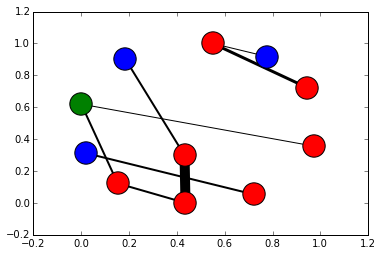

In [19]:
# draw('graphviz') gives better results, but requires pygraphviz
repxG.draw('spring')

Blue is a minus interface, red is a normal interface. Multiple state outer interfaces (not in this example) would be green.

### Alternate way of calculating transitions

There's another, perhaps better, way to calculate transitions. This does double count, but doesn't care if the how the transition happened (only that it did).

In [20]:
transitions = repx_net.transitions_from_traces(storage)

In [21]:
for (k1, k2)  in transitions.keys():
    print numeric_labels[k1], numeric_labels[k2], transitions[(k1, k2)]

1 -2 2
9 6 2
5 3 10
2 -1 1
8 9 1
9 8 1
3 -3 2
5 6 2
-3 3 2
0 2 3
-1 2 1
-2 1 2
3 5 10
6 5 2
6 9 2
2 0 3


In [22]:
for (k1, k2) in repx_net.analysis['n_accepted'].keys():
        print numeric_labels[k1], numeric_labels[k2], repx_net.analysis['n_accepted'][(k1, k2)]

-1 2 1
5 3 10
2 -1 1
8 9 1
9 8 1
-3 3 2
5 6 2
3 -3 2
1 -2 2
-2 1 2
0 2 3
9 6 2
3 5 10
6 5 2
6 9 2
2 0 3
